In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [1]:
# from sklearn.datasets import load_boston
# X,Y=load_boston(return_X_y=True)
from sklearn.datasets import load_wine
X,Y=load_wine(return_X_y=True)

In [2]:
print(X.shape)
print(Y.shape)

(178, 13)
(178,)


In [4]:
def normalize(X):
  for i in range(0,X.shape[1]):
    X[:,i] = (X[:,i] - np.mean(X[:,i]))
  return X

In [5]:
X=normalize(X)

In [6]:
def find_covariance(X):
  covariance_matrix=np.zeros((X.shape[1],X.shape[1]))
  mean_features=[X[:,j].sum(axis=0)/len(X) for j in range(X.shape[1])]
  # print(mean_features)
  
  def covariance_calculation_formula(vecX,vecY,X_mean,Y_mean):
    numerator=np.sum((np.array(vecX)-X_mean)*(np.array(vecY)-Y_mean))
    denominator=len(X)
    # denominator=np.sqrt(np.sum((np.array(vecX)-X_mean)**2) * np.sum((np.array(vecY)-Y_mean)**2))
    covariance_coff=numerator/denominator
    return covariance_coff

  for i in range(len(covariance_matrix)):
    for j in range(len(covariance_matrix)):
      covariance_matrix[i][j]=covariance_calculation_formula(X[:,i],X[:,j],mean_features[i],mean_features[j])
  # print(covariance_matrix)
  return covariance_matrix 

cov_matrix=find_covariance(X)

In [7]:
cov_matrix.shape

(13, 13)

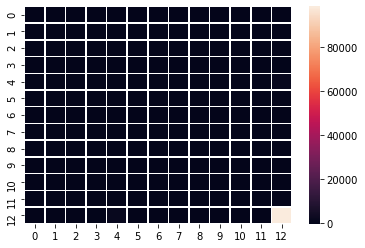

In [8]:
ax = sns.heatmap(cov_matrix , linewidth = 0.5 ,annot=False)

In [9]:
from numpy.linalg import eig
eig_values, eig_vectors = eig(cov_matrix)

In [10]:
eig_values,eig_vectors

(array([9.86444761e+04, 1.71565967e+02, 9.38509059e+00, 4.96313828e+00,
        1.22194160e+00, 8.36338792e-01, 2.77406256e-01, 1.50530810e-01,
        1.11467008e-01, 8.15761492e-03, 2.09539821e-02, 3.73648779e-02,
        7.12997795e-02]),
 array([[-1.65926472e-03, -1.20340617e-03,  1.68738094e-02,
          1.41446778e-01, -2.03369773e-02,  1.94120104e-01,
         -9.23280337e-01,  2.84820658e-01,  8.66006124e-02,
          8.02924535e-03,  1.56514071e-02, -1.49715080e-02,
         -2.24499994e-03],
        [ 6.81015556e-04, -2.15498184e-03,  1.22003373e-01,
          1.60389543e-01,  6.12883454e-01,  7.42472963e-01,
          1.50109941e-01, -6.46744678e-02,  1.56621385e-02,
         -1.10903923e-02, -6.72955455e-02, -2.31876506e-02,
         -1.85093501e-02],
        [-1.94905742e-04, -4.59369254e-03,  5.19874304e-02,
         -9.77280992e-03, -2.01755752e-02,  4.17529118e-02,
         -4.50095493e-02, -1.49339532e-01,  7.36498524e-02,
         -1.73685673e-01,  1.32063034e-01,  

In [11]:
val_vec_dict=dict()
for i in range(len(eig_values)):
  val_vec_dict[eig_values[i]] = eig_vectors[i]


In [32]:
sorted_eigen_values = sorted(eig_values,reverse=True)

k = 6
Ureduce = []
k_eigen_values_taken = []

for i in range(0,k):
  k_eigen_values_taken.append(sorted_eigen_values[i])
  Ureduce.append(val_vec_dict[sorted_eigen_values[i]])

Ureduce=np.array(Ureduce)
print("eigen_values_taken:",k_eigen_values_taken)
print(Ureduce)
print(Ureduce.shape)
print(X.T.shape)



# Data Projection 

Z = np.matmul(Ureduce,X.T)
Z.shape

eigen_values_taken: [98644.47609322546, 171.56596722801575, 9.385090592776987, 4.963138278385492, 1.2219416034929549, 0.8363387915368964]
[[-1.65926472e-03 -1.20340617e-03  1.68738094e-02  1.41446778e-01
  -2.03369773e-02  1.94120104e-01 -9.23280337e-01  2.84820658e-01
   8.66006124e-02  8.02924535e-03  1.56514071e-02 -1.49715080e-02
  -2.24499994e-03]
 [ 6.81015556e-04 -2.15498184e-03  1.22003373e-01  1.60389543e-01
   6.12883454e-01  7.42472963e-01  1.50109941e-01 -6.46744678e-02
   1.56621385e-02 -1.10903923e-02 -6.72955455e-02 -2.31876506e-02
  -1.85093501e-02]
 [-1.94905742e-04 -4.59369254e-03  5.19874304e-02 -9.77280992e-03
  -2.01755752e-02  4.17529118e-02 -4.50095493e-02 -1.49339532e-01
   7.36498524e-02 -1.73685673e-01  1.32063034e-01  9.54010643e-01
  -8.67996529e-02]
 [ 4.67130058e-03 -2.64503930e-02  9.38593003e-01 -3.30965260e-01
  -6.43523403e-02 -2.40653026e-02 -3.15265835e-02  1.51539118e-02
   2.04457785e-03  1.93956297e-03 -5.39380582e-03 -5.28216953e-02
   3.55402799

(6, 178)

# Reconstruction Phase

In [33]:
X_approx = np.matmul(Ureduce.T,Z) 

In [34]:
X_approx.shape

(13, 178)

# Variance Retained

In [35]:
average_squarred_projection_error = ((np.linalg.norm(X.T - X_approx))**2)/len(X)

total_variance_in_data = ((np.linalg.norm(X.T))**2)/len(X)

Variance_retained = (1-(average_squarred_projection_error / total_variance_in_data))*100

In [36]:
print("Variance_retained:",Variance_retained,"%")

Variance_retained: 71.64199887529186 %
